In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(500, 8)

# Multiple LinearRegression model Assumptions
Residuals are normally distributed, have constant variance, and are independent of each other.
No multicollinearity, which is when two or more independent variables are highly correlated with each other.
linear regression models assume that there is a linear relationship between the independent variables (features-x) and the dependent variable (target-y).

# Linearity

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


<Axes: >

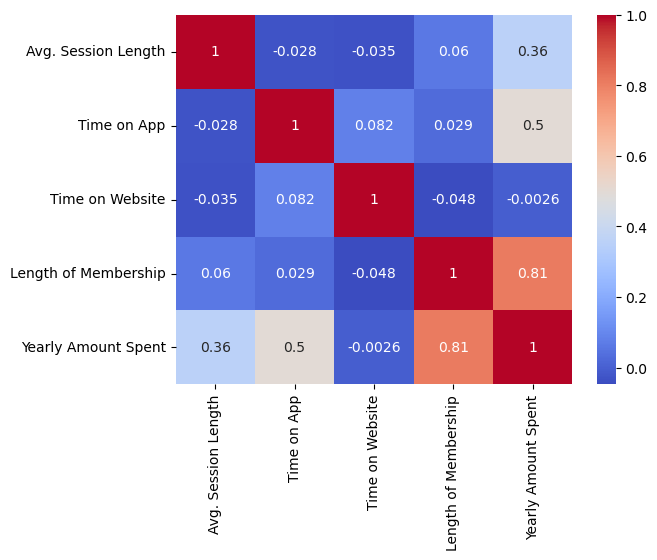

In [7]:
import seaborn as sns
corr = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')

# Multi_collinearity
my independent variables are; Avg. Session Length','Time on App','Time on Website', 'Length of Membership'the correlation coefficient between “Avg. Session Length” and “Time on App” is -0.027826, which indicates a weak negative correlation. The correlation coefficient between “Avg. Session Length” and “Time on Website” is -0.034987, which also indicates a weak negative correlation. The correlation coefficient between “Time on App” and “Time on Website” is 0.082388, which indicates a weak positive correlation. Finally, the correlation coefficient between “Avg. Session Length” and “Length of Membership” is 0.060247, which also indicates a weak positive correlation.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [10]:
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x,y)

LinearRegression()

In [12]:
import statsmodels.api as sm

In [13]:
lreg.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

# Whether to focus their efforts on their mobile app experience or their website?
The coefficient for ‘Time on App’ is greater than that of ‘Time on Website’, meaning spending more time on the app may lead to an increase in yearly amount spent.

<Axes: xlabel='Time on App'>

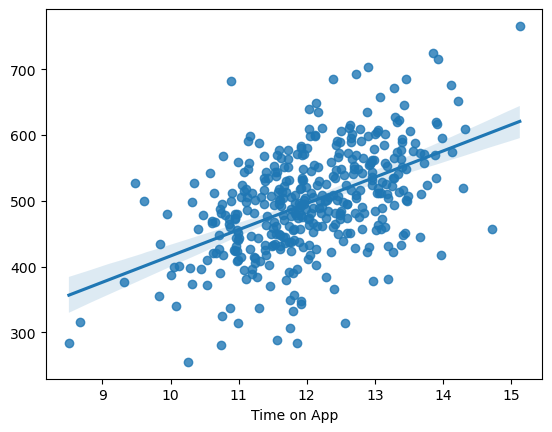

In [14]:
y_pred =lreg.predict(x_test)
sns.regplot(x=x_test['Time on App'], y=y_pred)

<Axes: xlabel='Time on Website'>

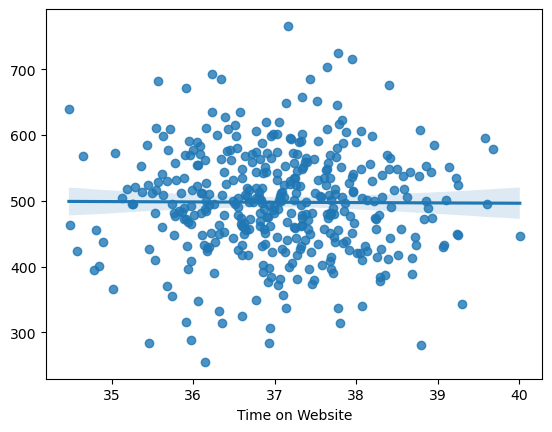

In [15]:
y_pred =lreg.predict(x_test)
sns.regplot(x=x_test['Time on Website'], y=y_pred)

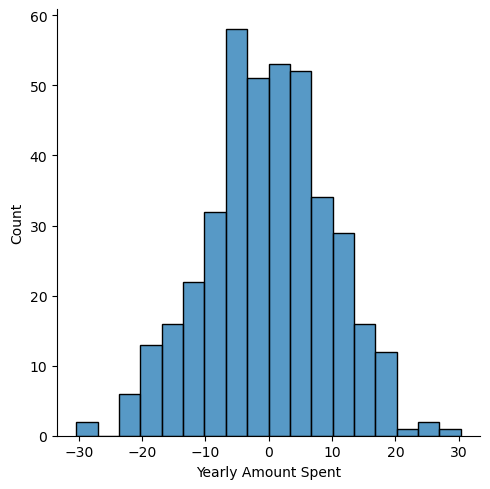

In [16]:
residuals = y_test - y_pred
sns.displot(residuals)